In [1]:
# Leitura do Dataset
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'


# Cria uma dataset simples
data = {
'Frequencia_compra': [5, 8, 3, 9, 7, 6, 2, 4, 1, 9,
11, 15, 14, 20, 18, 22, 25, 16, 21, 25],
'Valor_compra': [150, 70, 190, 140, 60, 80, 55, 75, 65, 85,
50, 120, 30, 20, 180, 160, 140, 70, 90, 40] }
df = pd.DataFrame(data)


In [2]:
df.head()

,Frequencia_compra,Valor_compra
0,5,150
1,8,70
2,3,190
3,9,140
4,7,60


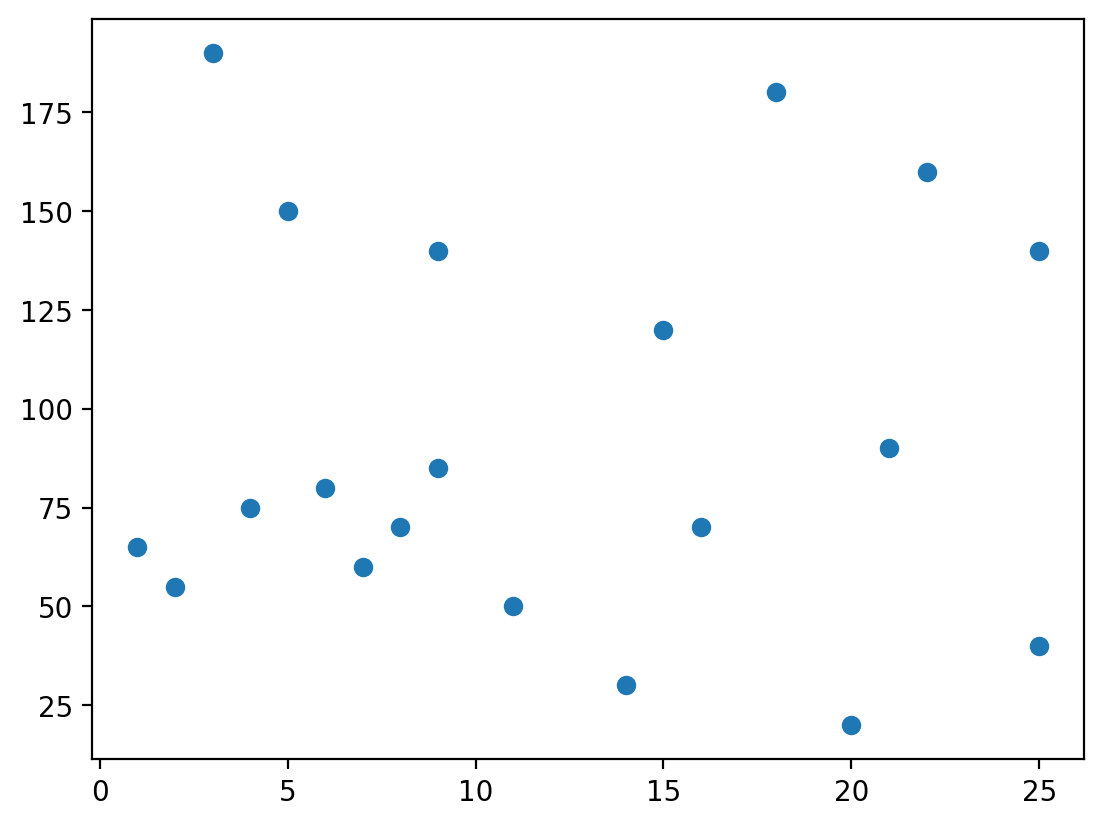

In [3]:
# Cria um gráfico de dispersao simples
x = df['Frequencia_compra']
y = df['Valor_compra']
plt.scatter(x, y)
plt.show()

### Objetivo: Criar um gráfico com marcação de quadrantes para facilitar a analise

In [4]:
# Inclui novos campos no dataframe
x_mean, y_mean = x.mean(), y.mean()

def color_dot(s):
    if (s['Valor_compra'] < y_mean) & (s['Frequencia_compra'] < x_mean):
        return 'firebrick'
    elif (s['Valor_compra'] > y_mean) & (s['Frequencia_compra'] > x_mean):
        return 'darkgreen'
    else:
        return 'grey'

df['Color'] = df.apply(color_dot, axis=1)
print(df.head())


   Frequencia_compra  Valor_compra      Color
0                  5           150       grey
1                  8            70  firebrick
2                  3           190       grey
3                  9           140       grey
4                  7            60  firebrick


#### Gráfico com marcação dos quadrantes

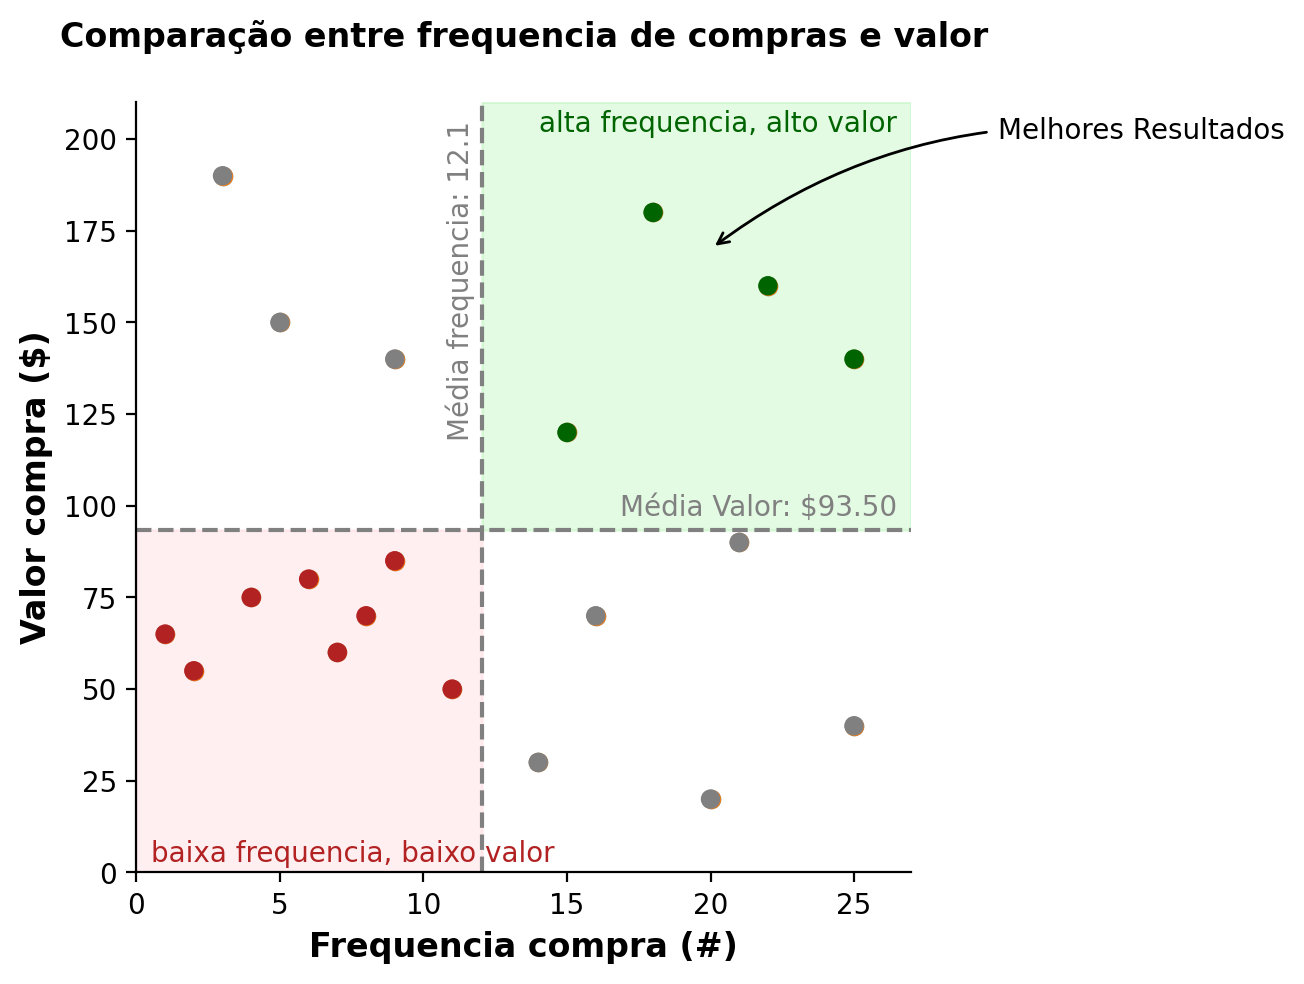

In [6]:
# Criação da figura e do eixo para o gráfico
fig, ax = plt.subplots(figsize=(5, 5))

# Definindo rótulos dos eixos com formatação
axes_fonts = {'fontsize': 12, 'fontweight': 'bold'}
ax.set_xlabel('Frequencia compra (#)', fontdict=axes_fonts)
ax.set_ylabel('Valor compra ($)', fontdict=axes_fonts)

# Definindo limites dos eixos com uma margem extra para melhor visualização
ymax = y.max() + 20
xmax = x.max() + 2
ax.set_ylim(0, ymax)
ax.set_xlim(0, xmax)

# Linha vertical para indicar a média de frequência de compras
ax.axvline(x=x.mean(), linestyle='dashed', color='grey')

# Linha horizontal para indicar a média do valor das compras
ax.axhline(y=y.mean(), linestyle='dashed', color='grey')

# Redefinindo variáveis x e y a partir do DataFrame
x = df['Frequencia_compra']
y = df['Valor_compra']

# Gráfico de dispersão simples (pontos)
plt.scatter(x, y)

# Adiciona texto explicativo próximo à linha média do valor das compras
ax.text(
    x=xmax - 0.5, y=y.mean() + 2,
    s=f'Média Valor: ${y.mean():.2f}',
    ha='right', va='bottom', fontsize=10, color='grey'
)

# Adiciona texto explicativo próximo à linha média da frequência de compras
ax.text(
    x=x.mean() - 0.25, y=ymax - 5,
    s=f'Média frequencia: {x.mean():.1f}',
    rotation=90, ha='right', va='top', color='grey'
)

# Calcula a fração da média de frequência em relação ao eixo x
x_mean_fraction = x.mean() / xmax

# Destaca área inferior esquerda (baixa frequência e baixo valor)
ax.axhspan(
    ymin=0, ymax=y.mean(), xmin=0, xmax=x_mean_fraction,
    alpha=0.25, color='pink'
)

# Destaca área superior direita (alta frequência e alto valor)
ax.axhspan(
    ymin=y.mean(), ymax=ymax, xmin=x_mean_fraction, xmax=1,
    alpha=0.25, color='lightgreen'
)

# Reexibe os pontos no gráfico
ax.scatter(x, y)

# Adiciona texto na região inferior esquerda
ax.text(x=0.5, y=3, s='baixa frequencia, baixo valor', color='firebrick')

# Adiciona texto na região superior direita
ax.text(
    x=xmax - 0.5, y=ymax - 2,
    s='alta frequencia, alto valor',
    color='darkgreen', ha='right', va='top'
)

# Adiciona pontos coloridos com base na classificação condicional feita antes
ax.scatter(x, y, c=df['Color'])

# Adiciona uma anotação com seta destacando um ponto importante
ax.annotate(
    text='Melhores Resultados', xy=(20, 170), xytext=(30, 200),
    arrowprops={
        'facecolor': 'black',
        'arrowstyle': '->',
        'connectionstyle': 'arc3,rad=0.2',
    }
)

# Remove as bordas superior e direita do gráfico para estética
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Define o título do gráfico com formatação
ax.set_title(
    'Comparação entre frequencia de compras e valor',
    weight='bold', size=12, pad=20
)

# Salva o gráfico em imagem
plt.savefig('grafico_frequencia_valor.png', dpi=300, bbox_inches='tight')


# Exibe o gráfico final
plt.show()
